# Реализация собственного алгоритма линейной регрессии

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

## Класс линейной регрессии

In [2]:
class SimpleLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.r_squared = None

    def fit(self, X, y):
        X = np.array(X).flatten() if X.ndim > 1 else np.array(X)
        y = np.array(y)

        # Вычисляем средние значения
        mean_x = np.mean(X)
        mean_y = np.mean(y)

        # Вычисляем числитель и знаменатель для коэффициента наклона
        numerator = np.sum((X - mean_x) * (y - mean_y))
        denominator = np.sum((X - mean_x) ** 2)

        # Вычисляем коэффициенты
        self.coef_ = numerator / denominator if denominator != 0 else 0
        self.intercept_ = mean_y - self.coef_ * mean_x

        # Вычисляем коэффициент детерминации
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - mean_y) ** 2)
        self.r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

        return self

    def predict(self, X):
        X = np.array(X).flatten() if X.ndim > 1 else np.array(X)
        return self.intercept_ + self.coef_ * X

    def get_params(self):
        return {
            'coefficient': self.coef_,
            'intercept': self.intercept_,
            'r_squared': self.r_squared
        }

## Функция визуализация регрессии

In [3]:
def plot_data_with_regression(X, y, X_col_name, y_col_name, coef, intercept, fig_num=1):
    plt.figure(fig_num, figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(X, y, color='blue', alpha=0.7, label='Исходные данные')
    plt.title(f'{y_col_name} vs {X_col_name} - Исходные данные')
    plt.xlabel(X_col_name)
    plt.ylabel(y_col_name)
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.scatter(X, y, color='blue', alpha=0.7, label='Исходные данные')

    # Отрисовка регрессионной прямой
    x_line = np.linspace(min(X), max(X), 100)
    y_line = intercept + coef * x_line
    plt.plot(x_line, y_line, color='red', linewidth=2, label=f'y = {intercept:.2f} + {coef:.2f}x')

    plt.title(f'{y_col_name} vs {X_col_name} - Регрессионная прямая')
    plt.xlabel(X_col_name)
    plt.ylabel(y_col_name)
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Подграфик 3: Квадраты ошибок
    plt.subplot(1, 3, 3)
    plt.scatter(X, y, color='blue', alpha=0.7, label='Исходные данные')
    plt.plot(x_line, y_line, color='red', linewidth=2, label=f'y = {intercept:.2f} + {coef:.2f}x')

    # Отрисовка квадратов ошибок
    y_pred = intercept + coef * X
    for xi, yi, ypi in zip(X, y, y_pred):
        x_square = [xi, xi, xi, xi, xi]
        y_square = [yi, ypi, ypi, yi, yi]
        plt.fill(x_square, y_square, 'gray', alpha=0.2)
        plt.plot(x_square, y_square, 'gray', alpha=0.5, linewidth=0.5)

    plt.title(f'{y_col_name} vs {X_col_name} - Квадраты ошибок')
    plt.xlabel(X_col_name)
    plt.ylabel(y_col_name)
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

## Функция вывода статистических данных

In [4]:
def print_statistics(data, column_name):
    """Вывод статистической информации о столбце данных"""
    print(f"\nСтатистика для столбца '{column_name}':")
    print(f"  Количество: {len(data)}")
    print(f"  Минимум: {np.min(data):.2f}")
    print(f"  Максимум: {np.max(data):.2f}")
    print(f"  Среднее: {np.mean(data):.2f}")

## Получение данных из файла 

In [5]:
data = pd.read_csv('./student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Вывод статистических данных

In [6]:
for column in data.columns:
    print_statistics(data[column], column)


Статистика для столбца 'Hours':
  Количество: 25
  Минимум: 1.10
  Максимум: 9.20
  Среднее: 5.01

Статистика для столбца 'Scores':
  Количество: 25
  Минимум: 17.00
  Максимум: 95.00
  Среднее: 51.48


## Фиксация столбцов для анализа

In [7]:
X_col = data.columns[0]
y_col = data.columns[1]
print(f"Выбрано: X = '{X_col}', Y = '{y_col}'")

Выбрано: X = 'Hours', Y = 'Scores'


In [8]:
X = data[X_col].values
y = data[y_col].values

## Метод наименьших квадратов  


### Обучение модели

In [9]:
model = SimpleLinearRegression()
model.fit(X, y)
params = model.get_params()

print(f"  Коэффициент наклона: {params['coefficient']:.4f}")
print(f"  Коэффициент сдвига: {params['intercept']:.4f}")
print(f"  Коэффициент детерминации: {params['r_squared']:.4f}")

  Коэффициент наклона: 9.7758
  Коэффициент сдвига: 2.4837
  Коэффициент детерминации: 0.9529


---

# Работа с набором данных diabetes

## Загрузка данных 

In [10]:
diabetes = datasets.load_diabetes()
print(f"Количество признаков: {diabetes.data.shape[1]}")
print(f"Количество образцов: {diabetes.data.shape[0]}")
print(f"Названия признаков: {diabetes.feature_names}")

Количество признаков: 10
Количество образцов: 442
Названия признаков: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Корреляция признаков с целевой переменной

In [11]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
correlations = diabetes_df.corr()['target'].abs().sort_values(ascending=False)

for i, (feature, corr) in enumerate(correlations.items()):
    if feature != 'target':
        print(f"  {i + 1:2d}. {feature:10s}: {corr:.4f}")

   2. bmi       : 0.5865
   3. s5        : 0.5659
   4. bp        : 0.4415
   5. s4        : 0.4305
   6. s3        : 0.3948
   7. s6        : 0.3825
   8. s1        : 0.2120
   9. age       : 0.1879
  10. s2        : 0.1741
  11. sex       : 0.0431


## Признак с наибольшей корреляцией

In [12]:
selected_feature = correlations.index[1]
print(f"\nВыбран признак: '{selected_feature}' (наибольшая корреляция с target)")


Выбран признак: 'bmi' (наибольшая корреляция с target)


## Готовим данные и разделяем выборки   

In [13]:
X_diabetes = diabetes_df[[selected_feature]].values
y_diabetes = diabetes_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)
print(f"Обучающая выборка: {X_train.shape[0]} образцов")
print(f"Тестовая выборка: {X_test.shape[0]} образцов")

Обучающая выборка: 353 образцов
Тестовая выборка: 89 образцов


## Обучение модели SK-Learn

In [14]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)

print(f"Коэффициент наклона: {sklearn_model.coef_[0]:.4f}")
print(f"Коэффициент сдвига: {sklearn_model.intercept_:.4f}")

Коэффициент наклона: 998.5777
Коэффициент сдвига: 152.0034


## Обучение собственной модели

In [15]:
my_model = SimpleLinearRegression()
my_model.fit(X_train.flatten(), y_train)
our_params = my_model.get_params()

print(f"Коэффициент наклона: {our_params['coefficient']:.4f}")
print(f"Коэффициент сдвига: {our_params['intercept']:.4f}")
print(f"Коэффициент детерминации: {our_params['r_squared']:.4f}")

Коэффициент наклона: 998.5777
Коэффициент сдвига: 152.0034
Коэффициент детерминации: 0.3657


## Сравнение предсказаний

In [16]:
y_pred_sklearn = sklearn_model.predict(X_test)
y_pred_our = my_model.predict(X_test.flatten())

results_df = pd.DataFrame({
    'Фактические значения': y_test[:10],
    'Scikit-Learn': y_pred_sklearn[:10].round(2),
    'Моя модель': y_pred_our[:10].round(2),
    'Разница': (y_pred_sklearn[:10] - y_pred_our[:10]).round(4)
})
print(results_df.to_string())

   Фактические значения  Scikit-Learn  Моя модель  Разница
0                 219.0        145.81      145.81      0.0
1                  70.0        188.86      188.86      0.0
2                 202.0        147.96      147.96      0.0
3                 230.0        203.93      203.93     -0.0
4                 111.0        131.81      131.81      0.0
5                  84.0        127.51      127.51      0.0
6                 242.0        322.32      322.32     -0.0
7                 272.0        197.47      197.47      0.0
8                  94.0         61.86       61.86      0.0
9                  96.0        167.33      167.33     -0.0


## Визуализация полученных данных

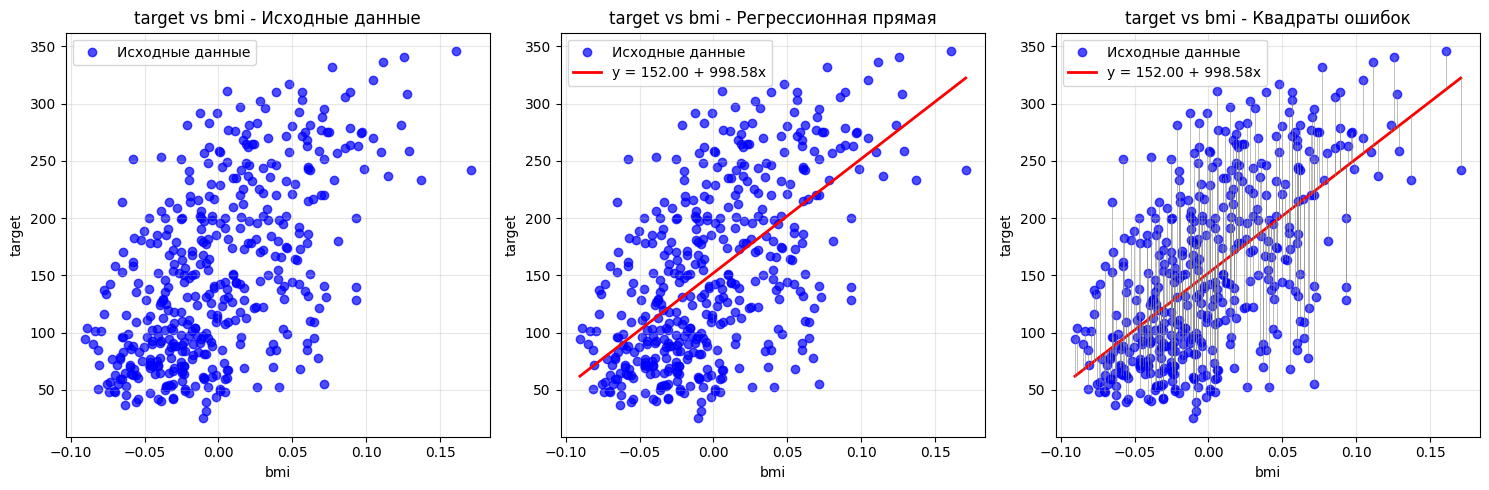

In [17]:
X_all = np.vstack([X_train, X_test])
y_all = np.concatenate([y_train, y_test])
plot_data_with_regression(
    X_all.flatten(), y_all,
    selected_feature, 'target',
    our_params['coefficient'], our_params['intercept'],
    fig_num=2
)